# Wrapping up

Throughout this course, we have covered the most important foundational programming skills a future Data Scientist needs, with a particular emphasis on Python.

For both languages, we explored their syntax, different data types, and how to work with data structures. We also delved into implementing loops, functions, and even classes (which is uncommon in beginner programming courses). Additionally, we discussed basic data science operations in both languages, particularly focusing on how to inspect and interact with raw data.

Now, coming to the question of **Python vs. R**: which one should you choose? It’s entirely up to you—both are excellent tools, as we have emphasized throughout the course. Keep in mind that you can essentially achieve the same results in one language as in the other. For example, when it comes to data manipulation, see this comparison: [Python vs R](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html).

Here is my personal perspective though:

- **Python**: Ideal for programmatic scenarios such as developing complex libraries, thanks to its versatility, simple syntax, and readability. Moreover, for machine learning and deep learning applications, Python remains the top choice.
  
- **R**: Best suited for advanced statistical analysis, such as mixed linear modeling, factor analysis, mediation analysis, and Bayesian statistics.  In addition, while I do not use it as often as I should, `ggplot2` can produce exceptionally high-quality graphs—so be sure to consider this in the future!

## Looking Ahead

There are certain things we have not covered in this course that a Data Scientist should likely master in the future. Here are some examples:

### Visualization

Clear and effective visualization is crucial for communicating with data. 

Here are a few examples:

- **Python**: `matplotlib`, `seaborn`
- **R**: `ggplot2`
- **Cross-platform**: `plotly`, `shiny`

**Matplotlib**

In [39]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [40]:
# Create some data
rng = np.random.RandomState(0)              # creates a random range seeded from 0
x = np.linspace(0, 10, 500)                 # creates evenly spaced numbers of a specified interval
y = np.cumsum(rng.randn(500, 6), 0)         # creates the sum of random numbers within a range.

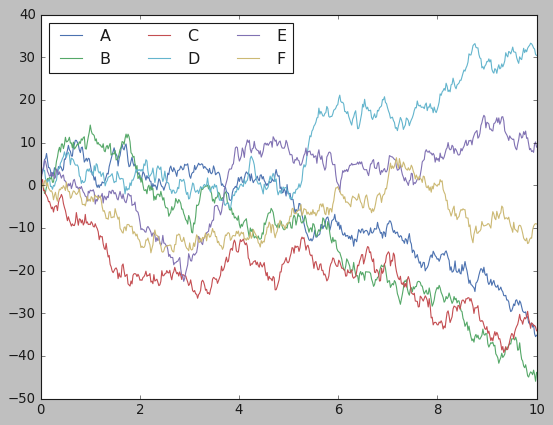

In [41]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=3, loc='upper left');

**Seaborn**

In [42]:
import seaborn as sns

In [43]:
xy_df = pd.concat([pd.DataFrame({"x": x}), 
                pd.DataFrame(y, columns=["A", "B", "C", "D", "E", "F"])], axis=1)
xy_df = pd.melt(xy_df, id_vars=["x"], var_name="group", value_name="y")
xy_df


x group          y
0      0.00000     A   1.764052
1      0.02004     A   2.714141
2      0.04008     A   3.475178
3      0.06012     A   3.788246
4      0.08016     A   6.058001
...        ...   ...        ...
2995   9.91984     F -10.465950
2996   9.93988     F  -9.613061
2997   9.95992     F  -9.165378
2998   9.97996     F  -9.004272
2999  10.00000     F  -9.084870

[3000 rows x 3 columns]

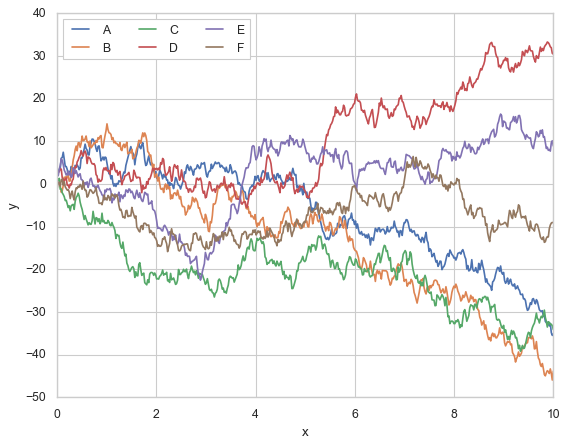

In [51]:
sns.set(style="whitegrid")
sns.lineplot(x="x", y="y", hue="group", data=xy_df)
plt.legend(ncol=3, loc='upper left')

### Analysis

Hera are a few examples of basic libraries for data anaylis in Python and R, with a bit of predominance bias towards the former:

- **Statistics**: `scipy` (Python), `statsmodels` (Python), Base R, `lme4` (R), `blme` (R).
- **Machine lerning**: `scikit-learn` (Python), `caret` (R), `xgboost` (cross-platform).
- **Deep lerning**: `keras` (Python), `pytorch`  (Python), `tensorflow`(Python).

**scikit-learn**

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

X, y = load_iris()["data"], load_iris()["target"]
clf = DecisionTreeClassifier()

res = cross_val_score(clf, X, y, cv=5)

print("the average accuracy in classifying the types of Iris using a decision tree and cross-validation is:", 
      res.mean())

the average accuracy in classifying the types of Iris using a decision tree and cross-validation is: 0.9666666666666668


**scipy**

In [41]:
# A two-sample t-test, adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
import numpy as np
from scipy import stats
rng = np.random.RandomState(1234)

rvs1 = stats.norm.rvs(loc=5, scale=5, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5.57, scale=5, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)

TtestResult(statistic=-2.0456709273958644, pvalue=0.04105049135941344, df=998.0)

**statsmodels**

In [51]:
# The same as above, but using a linear regression model 
# (tip for life: any almost basic stastical tests is just a particular instation of a linear regression model).

import statsmodels.api as sm

y=np.concatenate((rvs1, rvs2))
X=np.column_stack(([1]*len(y), 
                   [0]*len(rvs1) + [1]*len(rvs2)))
model = sm.OLS(endog=y, exog=X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.185
Date:                Tue, 03 Dec 2024   Prob (F-statistic):             0.0411
Time:                        10:19:40   Log-Likelihood:                -3001.1
No. Observations:                1000   AIC:                             6006.
Df Residuals:                     998   BIC:                             6016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0487      0.218     23.180      0.0

### Command-Line Terminal Programming

- Programming that takes place in a **terminal**, which a text-based interface for interacting directly with the computer.
- Commands in a terminal are interpreted by a **shell**. Common shells include Bash (popular on Linux and macOS), Zsh (modern and customizable), and PowerShell (Windows-specific).
- **Essential for managing files, running scripts, and interacting with compute clusters (e.g. SLURM).**

In Jupyter notebooks, you can execute shell commands by prefixing them with `!`. 

For example, we can navigate directories:

In [52]:
# Print the current directory
!pwd

# List files in the directory
!ls

/home/javi/Documentos/docencia/DS-1002/DS1002-book/chapters
01-getting_started.md	module-1  module-4   wrap-up.ipynb
02-python-basics.ipynb	module-2  module-5
04-python-basics.ipynb	module-3  my_folder


We can also manage files and directories:

In [61]:
# Create a new folder and file
!mkdir -p my_folder # make new dir; -p option to not raise an error if it already existed
!rm -f my_folder/* # Remove preexisting content; -f option to not raise an error if the folder was already empty
!touch my_folder/hello_world.py # Create a new file named "hello world.py"
!echo "print('Hello, World!\nCode run from:', __file__)" > my_folder/hello_world.py # Add some a line of code to this file

In [62]:
# List contents of the folder
!ls my_folder

hello_world.py


And run scripts:

In [63]:
!python my_folder/hello_world.py

Hello, World!
Code run from: /home/javi/Documentos/docencia/DS-1002/DS1002-book/chapters/my_folder/hello_world.py


### GitHub

- Web-based platform for version control and collaboration built on top of Git, a version control system.
- It also has a powerful terminal programming where to easily interact and change your repositories.
- Allows you to track changes, collaborate with others, and share your work.

Common Use Cases:

- **Code Management**: Store and version codebases for projects/libraries.  
- **Team Collaboration**: Coordinated team efforts on software development or data science projects.
- **Portfolio Hosting**: Showcase projects and skills for personal branding.
- **Open Source Contribution**: Contribute to or learn from public repositories.
- **Documentation**: Use GitHub Pages to create project websites or host documentation.

A few personal examples:
- Personal porfolio: https://github.com/jrasero
- This very course's book: https://github.com/UVADS/DS1002-book
- Niphlem: NeuroImaging-oriented Physiological Log Extraction for Modeling, toolbox: https://github.com/CoAxLab/niphlem, and [its documentation (rendered through Github)](https://coaxlab.github.io/niphlem).